In [1]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics

In [2]:
"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.tools import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

In [3]:
"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [4]:
"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [5]:
"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

[MLENS] backend: threading


In [6]:
"""Customize visualization."""
plt.style.use("bmh")                    # Use bmh's style for plotting
sns.set_style({"axes.grid":False})      # Remove gridlines

"""Display markdown formatted output like bold, italic bold etc."""
from IPython.display import Markdown
def bold(string):
    return display(Markdown(f"**{string}**"))

In [7]:
"""Read and preview the train data from csv file."""
train = pd.read_csv("Data_Set/Titanic/train.csv")
bold("Train Data:")
display(train.head(5))

"""Read and preview the test from csv file."""
test = pd.read_csv("Data_Set/Titanic/test.csv")
bold("Test Data:")
display(test.head(5))

**Train Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Test Data:**

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
"""Shape of the train data File"""
train_Shape = train.shape
bold("Train Data Shape:")
display(train_Shape)

"""Shape of the test data File."""
test_Shape = test.shape
bold("Test Data Shape:")
display(test_Shape)

**Train Data Shape:**

(891, 12)

**Test Data Shape:**

(418, 11)

In [9]:
"""Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis."""
merged = pd.concat([train, test], sort = False).reset_index(drop=True)
bold("Preview of Merged Data:")
display(merged.head(5))

**Preview of Merged Data:**

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
"""Shape of the combined data."""
bold("Shape of the Merged Data:")
display(merged.shape)

"""Variables in the combined data."""
bold("Name of the Variables in merged data:")
display(merged.columns)

**Shape of the Merged Data:**

(1309, 12)

**Name of the Variables in merged data:**

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
"""Create a function to plot a variable's absolute and relative frequency."""
def plotFrequency(variable):
    """Plots absolute and relative frequency of a avriable."""
    
    # Calculates absolute frequency
    absFreq = variable.value_counts()
    
    # Calculates relative frequency
    relFreq = variable.value_counts(normalize=True).round(4)*100
    
    # Creates a dataframe off absolute and relative frequency
    df = pd.DataFrame({
        "absoluteFrequency":absFreq,
        "relativeFrequency":relFreq
    })
    
    # Create two subplots of bar chart
    fig=make_subplots(
        rows=1, 
        cols=2,
        vertical_spacing=0.3,
        subplot_titles=("Absolute Frequency", "Relative Frequency"),
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for absolute frequency
    fig.add_trace(
        go.Bar(
        y=df.index, 
        x=df.absoluteFrequency,
        orientation="h",
        text=df.absoluteFrequency,
        hoverinfo="x+y",
        textposition="auto", 
        name="Abs Freq",
        textfont=dict(family="sans serif",size=14),
        marker = dict(color=df.absoluteFrequency, colorscale="Rainbow")),
        row=1,
        col=1
        )

    # Add another trace for relative frequency
    fig.add_trace(
        go.Bar(y=df.index,
        x=df.relativeFrequency.round(2),
        orientation="h",
        text=df.relativeFrequency.round(2),
        hoverinfo="x+y",
        textposition="auto", 
        name="Rel Freq(%)",
        textfont=dict(family="sans serif",size=15),
        marker=dict(color=df.relativeFrequency.round(2), colorscale="Rainbow")),
        row=1,
        col=2
        )

    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=970,
        hovermode="closest",
        title_text=f"Absolute and Relative Frequency of {variable.name}",showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis title in bold
    fig.layout.yaxis1.update(title=f"<b>{variable.name}</b>")
    
    # Set x-axes titles in bold
    fig.layout.xaxis1.update(title="<b>Abs Freq</b>")
    fig.layout.xaxis2.update(title="<b>Rel Freq(%)</b>")
    # or, fig["layout"]["xaxis2"].update(title="<b>Rel Freq(%)</b>")
    return fig.show()

In [13]:
plotFrequency(merged.Survived)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [14]:
plotFrequency(train.Survived)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
plotFrequency(merged.Sex)

In [16]:
plotFrequency(merged.Pclass)

In [17]:
plotFrequency(merged.SibSp)

In [18]:
plotFrequency(merged.Embarked)

In [19]:
merged.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

In [20]:
Unique_Pclass = merged['Pclass'].value_counts()
display(Unique_Pclass)
print('Survived')
display(merged['Survived'].value_counts())
#merged.Pclass
#merged.Name
#merged.Sex
#merged.Age
#merged.SibSp
#merged.Parch
#merged.Ticket
#merged.Fare
#merged.Cabin
#merged.Embarked

3    709
1    323
2    277
Name: Pclass, dtype: int64

Survived


0.0    549
1.0    342
Name: Survived, dtype: int64

In [21]:
"""Create a function to plot a variable's absolute and relative frequency."""
def plotFrequency(variable):
    """Plots absolute and relative frequency of a avriable."""
    
    # Calculates absolute frequency
    absFreq = variable.value_counts()
    
    # Calculates relative frequency
    relFreq = variable.value_counts(normalize=True).round(4)*100
    
    # Creates a dataframe off absolute and relative frequency
    df = pd.DataFrame({
        "absoluteFrequency":absFreq,
        "relativeFrequency":relFreq
    })
    
    # Create two subplots of bar chart
    fig=make_subplots(
        rows=1, 
        cols=2,
        vertical_spacing=0.3,
        subplot_titles=("Absolute Frequency", "Relative Frequency"),
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for absolute frequency
    fig.add_trace(
        go.Bar(
        y=df.index, 
        x=df.absoluteFrequency,
        orientation="h",
        text=df.absoluteFrequency,
        hoverinfo="x+y",
        textposition="auto", 
        name="Abs Freq",
        textfont=dict(family="sans serif",size=14),
        marker = dict(color=df.absoluteFrequency, colorscale="Rainbow")),
        row=1,
        col=1
        )

    # Add another trace for relative frequency
    fig.add_trace(
        go.Bar(y=df.index,
        x=df.relativeFrequency.round(2),
        orientation="h",
        text=df.relativeFrequency.round(2),
        hoverinfo="x+y",
        textposition="auto", 
        name="Rel Freq(%)",
        textfont=dict(family="sans serif",size=15),
        marker=dict(color=df.relativeFrequency.round(2), colorscale="Rainbow")),
        row=1,
        col=2
        )

    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=970,
        hovermode="closest",
        title_text=f"Absolute and Relative Frequency of {variable.name}",showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axis title in bold
    fig.layout.yaxis1.update(title=f"<b>{variable.name}</b>")
    
    # Set x-axes titles in bold
    fig.layout.xaxis1.update(title="<b>Abs Freq</b>")
    fig.layout.xaxis2.update(title="<b>Rel Freq(%)</b>")
    # or, fig["layout"]["xaxis2"].update(title="<b>Rel Freq(%)</b>")
    return fig.show()

In [22]:
plotFrequency(merged.Survived)

In [23]:
plotFrequency(merged.Embarked)

In [24]:
"""Absolute frequency of Cabin."""
absFreqCabin = merged.Cabin.value_counts(dropna = False)
bold("Categories of Cabin:")
display(absFreqCabin.head())

**Categories of Cabin:**

NaN                1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
C22 C26               4
Name: Cabin, dtype: int64

In [25]:
merged.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [26]:
"""As frequency of Cabin isn't what we expected, let's count total categories in Cabin."""
bold("Total Categories in Cabin:")
display(absFreqCabin.count())

**Total Categories in Cabin:**

187

In [27]:
bold("Total Categories in Cabin:")
display(merged.Cabin.value_counts())

**Total Categories in Cabin:**

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
D                  4
                  ..
C130               1
A5                 1
C118               1
B4                 1
A19                1
Name: Cabin, Length: 186, dtype: int64

In [28]:
train.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [29]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
D              3
              ..
A5             1
C118           1
E63            1
F38            1
A19            1
Name: Cabin, Length: 147, dtype: int64

In [30]:
train.Cabin.sample(10)

173    NaN
119    NaN
99     NaN
797    NaN
461    NaN
265    NaN
252    C87
165    NaN
111    NaN
832    NaN
Name: Cabin, dtype: object

In [31]:
"""Count total categories in Name."""
bold("Total Categories in Name:")
display(merged.Name.value_counts().count())

**Total Categories in Name:**

1307

In [32]:
"""Let's finally check the what's inside the variable Name."""
bold("Preview of Name:")
display(merged.Name.head())

**Preview of Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [33]:
"""Count total groups in variable Ticket."""
bold("Total Groups in Ticket:")
display(merged.Ticket.value_counts().count())

**Total Groups in Ticket:**

929

In [34]:
"""Lets investigate Ticket."""
bold("Preview of Ticket:")
display(merged.Ticket.head())

**Preview of Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [35]:
"""Plot the absolute and relative frequency of SibSp to investigate its distribution."""
plotFrequency(merged.SibSp)

In [36]:
"""Absolute and relative frequency of Parch."""
plotFrequency(merged.Parch)

In [37]:
"""#1.Create a function to plot histogram and density plot."""
def plotHistogram(variable):
    """Plots histogram and density plot of a variable."""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"Distribution of {variable.name} with Histogram", f"Distribution of {variable.name} with Density Plot"))
    
    # This is a count histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            marker = dict(color = "chocolate")
        ),
    row=1,col=1)
    
    # This is a density histogram
    fig.add_trace(
        go.Histogram(
            x = variable,
            hoverinfo="x+y",
            histnorm = "density",
            marker = dict(color = "darkred")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        hovermode="closest",
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Density(%)</b>")
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()
    

    
'''#2.Calculate descriptive statistics.'''
def calculateSummaryStats(variable):
    stats = variable.describe()
    skewness = pd.Series(variable.skew(), index = ["skewness"])
    statsDf = pd.DataFrame(pd.concat([skewness, stats], sort = False), columns = [variable.name])
    statsDf = statsDf.reset_index().rename(columns={"index":"summaryStats"})
    return display(statsDf.round(2))

In [38]:
'''Plot histogram and density plot of Fare.'''
plotHistogram(merged.Fare)

In [39]:
"""Calculate summary statistics of Fare."""
bold("Summary Stats of Fare:")
calculateSummaryStats(merged.Fare)

**Summary Stats of Fare:**

,summaryStats,Fare
0,skewness,4.37
1,count,1308.00
2,mean,33.30
3,std,51.76
4,min,0.00
5,25%,7.90
6,50%,14.45
7,75%,31.28
8,max,512.33


In [40]:
"""Plot histogram and density plot of Age."""
plotHistogram(merged.Age)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [41]:
"""Calculate summary stats for Age"""
calculateSummaryStats(merged.Age)

,summaryStats,Age
0,skewness,0.41
1,count,1046.00
2,mean,29.88
3,std,14.41
4,min,0.17
5,25%,21.00
6,50%,28.00
7,75%,39.00
8,max,80.00


In [42]:
"""What does passengerId contain?"""
display(merged.PassengerId.head())

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [43]:
"""Let's preview the Cabin again."""
bold("Preview of Cabin:")
display(merged.Cabin.head())

**Preview of Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [44]:
"""It seems Cabin contains some missing values. Let's count them."""
bold("Missing Values in Cabin:")
display(merged.Cabin.isna().sum())

**Missing Values in Cabin:**

1014

In [45]:
"""Total categories in Cabin before processing."""
bold("Total Categories in Cabin before Processing:")
display(merged.Cabin.value_counts(dropna=False).count())

**Total Categories in Cabin before Processing:**

187

In [46]:
"""Flag all the NaNs of Cabin as 'X'."""
nanReplaced= merged.Cabin.fillna("X")

In [47]:
"""Extract only the 1st character from Cabin, which is only a Letter. And insert it to the dataframe."""
merged["cabinProcessed"] = nanReplaced.str.get(0) 
bold("Cabin Categories after Processing:")
display(merged.cabinProcessed.value_counts())

**Cabin Categories after Processing:**

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabinProcessed, dtype: int64

In [48]:
"""After processing, we can visualize the absolute and relative frequency of newly transformed Cabin variable."""
plotFrequency(merged.cabinProcessed)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [49]:
"""Lets see what's inside the Name."""
display(merged.Name.head(8))

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

In [50]:
firstName = merged.Name.str.split(".").str.get(0).str.split(",").str.get(-1)

In [51]:
"""Count the extracted categories of firstName from Name."""
display(firstName.value_counts())

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Ms                2
 Mlle              2
 Major             2
 Dona              1
 Capt              1
 Jonkheer          1
 Sir               1
 the Countess      1
 Lady              1
 Don               1
 Mme               1
Name: Name, dtype: int64

In [52]:
"""Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it."""
firstName.replace(to_replace = ["Dr", "Rev", "Col", "Major", "Capt"], value = "Officer", inplace = True,regex=True)

"""Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat."""
firstName.replace(to_replace = ["Dona", "Jonkheer", "Countess", "Sir", "Lady", "Don"], value = "Aristocrat", inplace = True,regex=True)

"""Finally Replace Mlle and Ms with Miss. And Mme with Mrs."""
firstName.replace({"Mlle":"Miss", "Ms":"Miss", "Mme":"Mrs"}, inplace = True,regex=True)

"""Replace the Aristocrat with Aristocrat"""
firstName.replace({"the Aristocrat":"Aristocrat"}, inplace = True,regex=True)

"""Insert a column named 'nameProcessed'."""
merged["nameProcessed"] = firstName

In [53]:
"""let's see how nameProcessed looks now"""
display(merged.nameProcessed.value_counts())

 Mr            757
 Miss          264
 Mrs           198
 Master         61
 Officer        23
 Aristocrat      6
Name: nameProcessed, dtype: int64

In [54]:
"""After processing, visualise and count absolute and relative frequency of transformed Name."""
plotFrequency(merged.nameProcessed)

In [55]:
"""Merge SibSp and Parch to create a variable Family_size."""
merged["familySize"] = merged.SibSp + merged.Parch + 1  # Adding 1 for single person
bold("Categoiries in Family_size:")
display(merged.familySize.value_counts())

**Categoiries in Family_size:**

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: familySize, dtype: int64

In [56]:
"""Create buckets of single, small, medium, and large and then put respective values into them."""
merged.familySize.replace(to_replace = [1], value = "single", inplace = True)
merged.familySize.replace(to_replace = [2,3], value = "small", inplace = True)
merged.familySize.replace(to_replace = [4,5], value = "medium", inplace = True)
merged.familySize.replace(to_replace = [6, 7, 8, 11], value = "large", inplace = True)

In [57]:
"""After processing, visualise and count the absolute and relative frequency of engineered familySize."""
plotFrequency(merged.familySize)

In [58]:
"""Let's preview the variable Ticket first."""
display(merged.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [59]:
"""Assign 'N' if there is only digits in Ticket. Otherwise just get the 1st character from Ticket."""
otherwise = merged.Ticket.str.split(" ").str.get(0).str.get(0) # This extracts the 1st character
merged["ticketProcessed"] = np.where(merged.Ticket.str.isdigit(), "N", otherwise)

In [60]:
"""Now calculate the categories in the ticketProcessed column."""
bold("Ticket after Processing:")
display(merged.ticketProcessed.value_counts())

**Ticket after Processing:**

N    957
S     98
P     98
C     77
A     42
W     19
F     13
L      5
Name: ticketProcessed, dtype: int64

In [61]:
"""After processing, visualise and count the absolute and relative frequency of updated Ticket."""
plotFrequency(merged.ticketProcessed)

In [62]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered


"""#2.Create another function to plot boxplot with and without outliers."""
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [63]:
 """Plot Age with and without outliers."""
plotBoxPlot(merged.Age,removeOutliers(merged.Age))

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [64]:
"""Plot Fare with and without outliers."""
plotBoxPlot(merged.Fare,removeOutliers(merged.Fare))

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [65]:
"""#1.Create a function to calculate missing values"""
def calculateMissingValues(variable):
    """Calculates missing values of a variable."""
    
    return merged.isna().sum()[merged.isna().sum()>0] # Returns only columns with missing values



""""#2.Create a function to plot scatter plot.
This can also be used to plot missing values"""
def plotScatterPlot(x, y, title, yaxis):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = "markers",
    marker = dict(color = y, size = 35, showscale = True, colorscale = "Rainbow"))
    layout = go.Layout(hovermode= "closest",
                       title = title,
                       yaxis = dict(title = yaxis),
                       height=600,
                       width=900,
                       showlegend=False,
                        paper_bgcolor="rgb(243, 243, 243)",
                        plot_bgcolor="rgb(243, 243, 243)"
                      )
    fig = go.Figure(data = [trace], layout = layout)
    return fig.show()      

"""Plot variables with their corresponding missing values."""
plotScatterPlot(calculateMissingValues(merged).index,
               calculateMissingValues(merged),
               "Features with Missing Values",
               "Missing Values")



In [66]:
"""Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent."""
merged.Embarked.fillna(value="S", inplace = True)

"""Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median."""
merged.Fare.fillna(value=merged.Fare.median(), inplace = True)

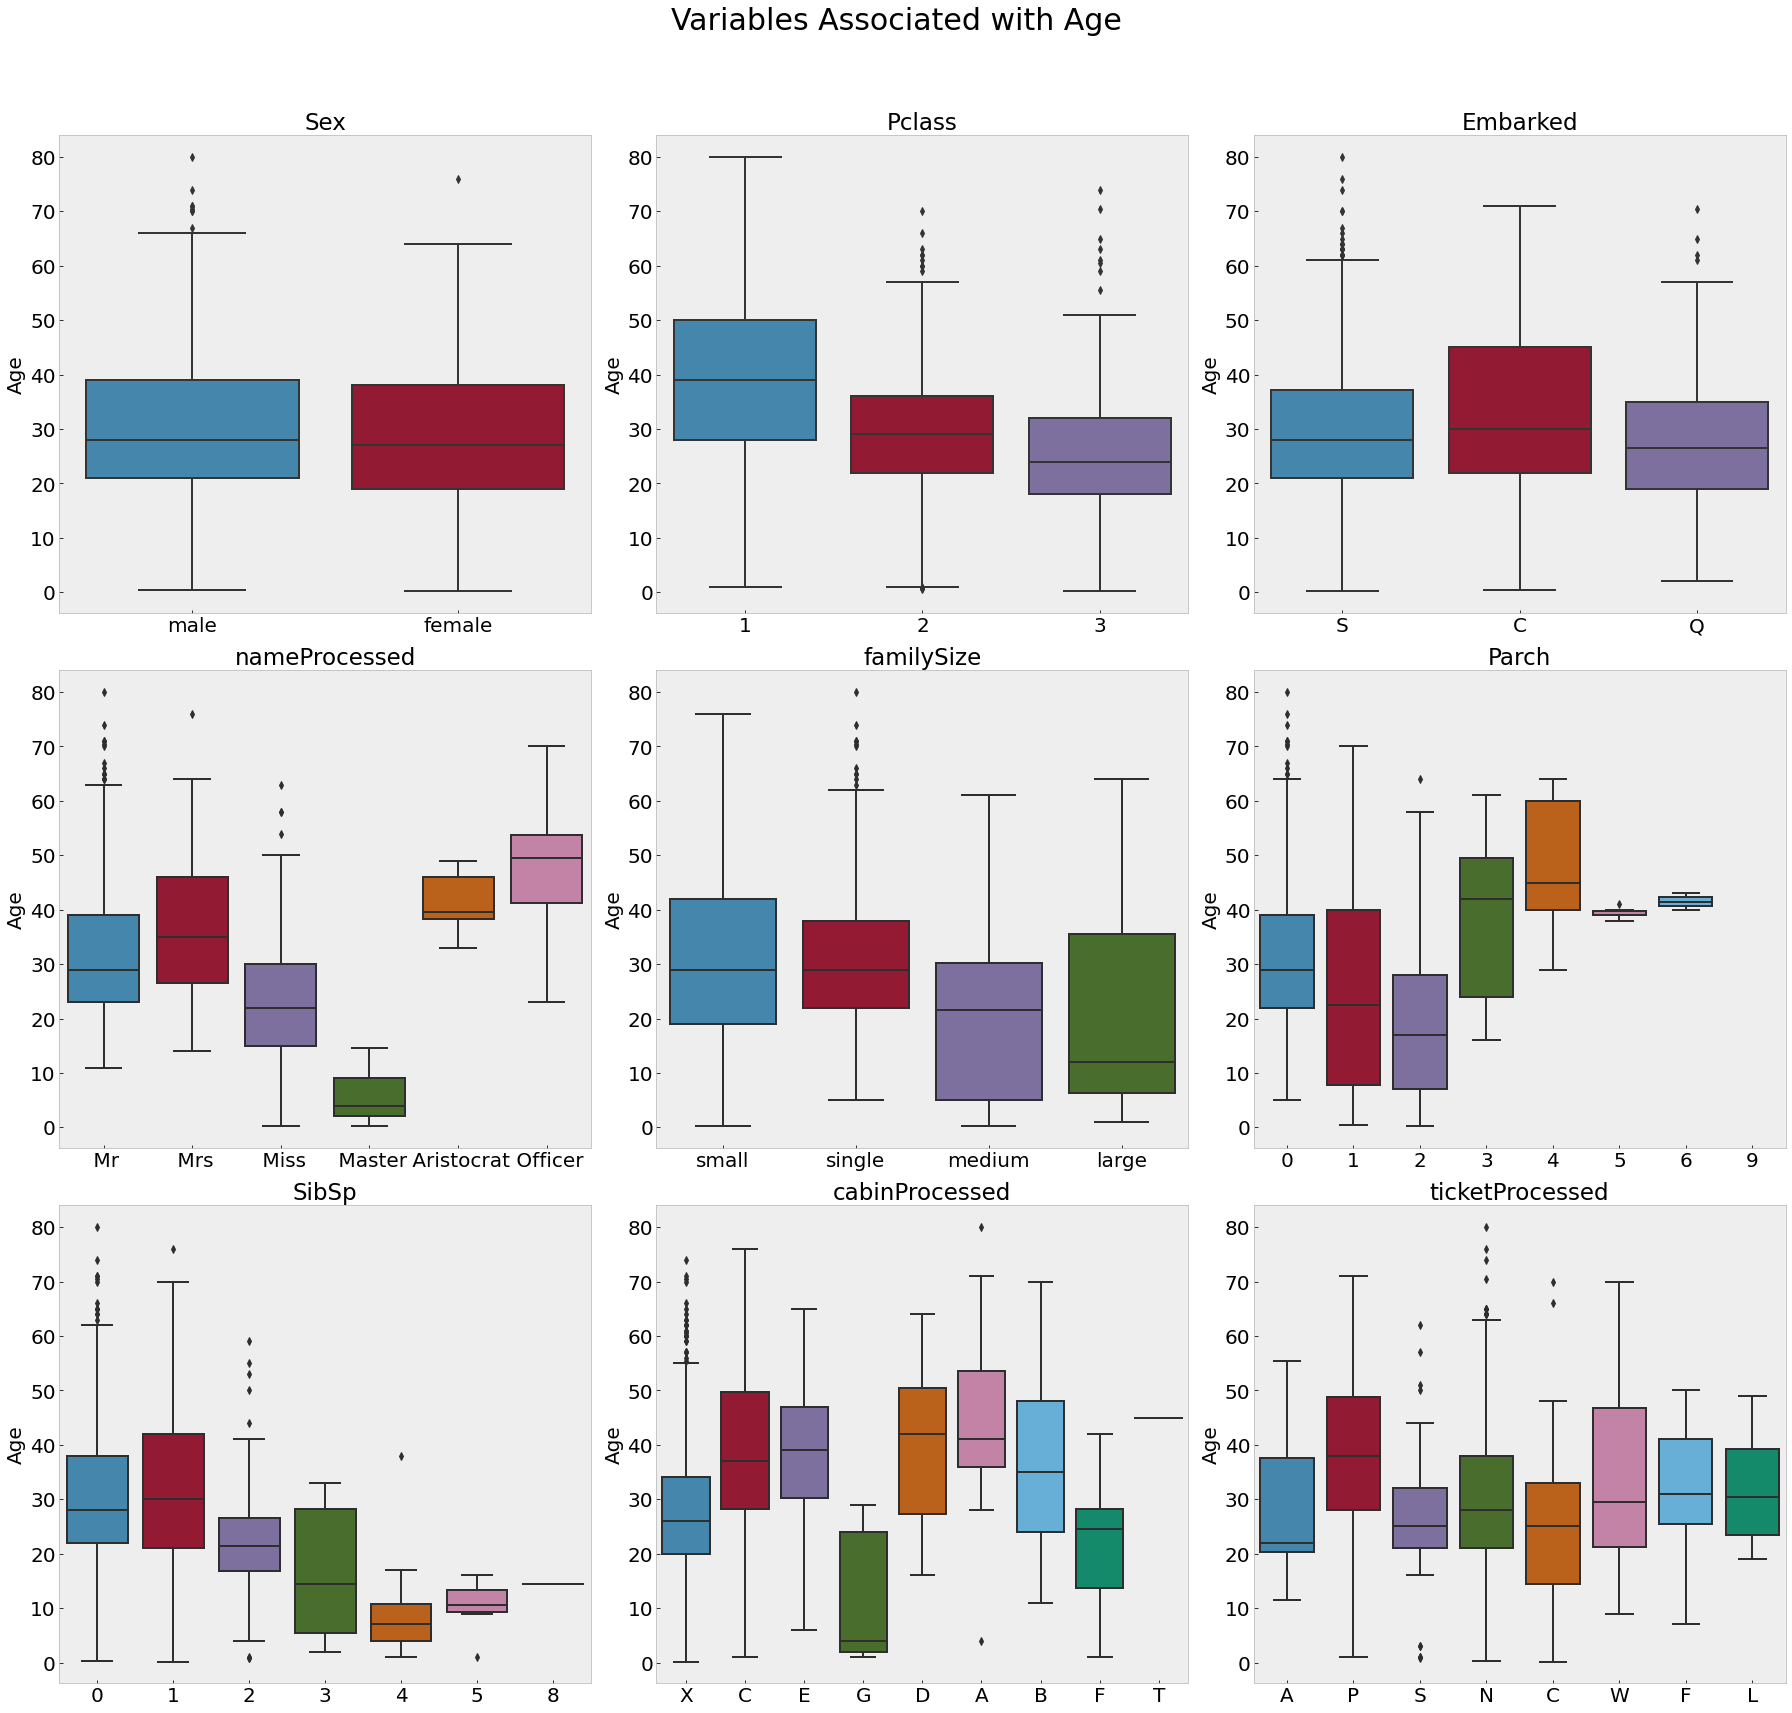

In [67]:
"""Create a boxplot to view the variables correlated with Age. First extract the variables we're interested in."""
toSearch = merged.loc[:, ["Sex", "Pclass", "Embarked", "nameProcessed", "familySize", "Parch", 
                             "SibSp", "cabinProcessed", "ticketProcessed"]]

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
for ax, column in zip(axes.flatten(), toSearch.columns):
    sns.boxplot(x = toSearch[column], y = merged.Age, ax = ax)
    ax.set_title(column, fontsize = 23)
    ax.tick_params(axis = "both", which = "major", labelsize = 20)
    ax.tick_params(axis = "both", which = "minor", labelsize = 20)
    ax.set_ylabel("Age", fontsize = 20)
    ax.set_xlabel("")
fig.suptitle("Variables Associated with Age", fontsize = 30)
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

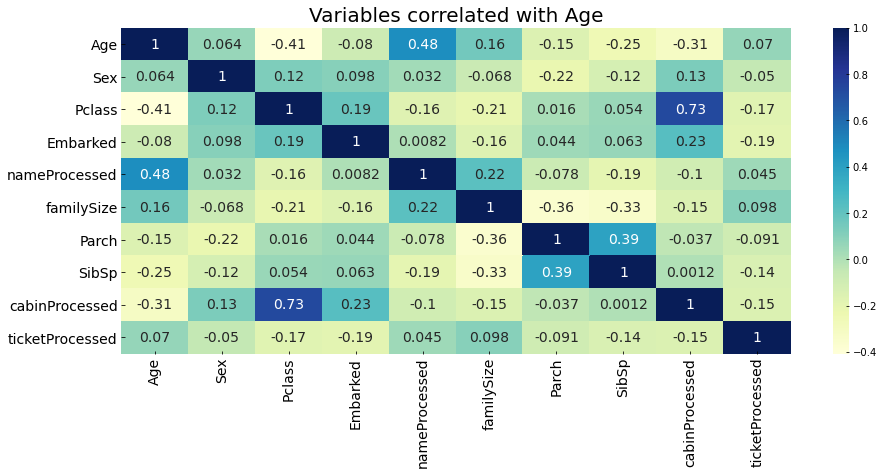

In [68]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our 
boxplot interpretation holds true. We need to convert categorical variable into numerical to plot 
correlation heatmap. So convert categorical variables into numerical."""
from sklearn.preprocessing import LabelEncoder
toSearch = toSearch.agg(LabelEncoder().fit_transform)
toSearch["Age"] = merged.Age # Inserting Age in dataframe "toSearch".
toSearch = toSearch.set_index("Age").reset_index() # Move Age column at index 0.

# Now create the correlation heatmap
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
sns.heatmap(toSearch.corr(), cmap ="YlGnBu", annot=True, annot_kws={"size":14}, ax=ax)
ax.set_title("Variables correlated with Age", fontsize = 20)
ax.tick_params(axis = "both", which = "major", labelsize = 14)
ax.tick_params(axis = "both", which = "minor", labelsize = 14)
plt.show()

In [69]:
"""Impute Age with median of respective columns (i.e., nameProcessed and Pclass)."""
merged.Age = merged.groupby(["nameProcessed", "Pclass"])["Age"].transform(lambda x: x.fillna(x.median()))

"""So by now we should have variables with no missing values."""
bold("Missing Values after Imputation:")
display(merged.isnull().sum())

**Missing Values after Imputation:**

PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                   0
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
cabinProcessed        0
nameProcessed         0
familySize            0
ticketProcessed       0
dtype: int64

In [70]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]
df_test = df_test.drop(columns = ["Survived"], axis = 1)

"""#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation."""
def boxplotAndCorrelation(numVariable,catVariable=df_train.Survived):
    """Return boxplot between a categorical and numerical variable. Also calculates biserial correlation.
    numVariable = a numerical variable of interest."""
    
    # Calculate point biserial correlation and p value
    biserialCorr = stats.pointbiserialr(numVariable,catVariable)[0].round(2)
    pValue = stats.pointbiserialr(numVariable,catVariable)[1].round(5)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots boxplot of categorical variable vs numerical variable
    fig.add_trace(
        go.Box(
            x = catVariable,
            y = numVariable,
            marker_color="lightseagreen",
            ))
    
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Association between {catVariable.name} and {numVariable.name} (corr: {biserialCorr}, p: {pValue})",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>{numVariable.name}</b>")
    return fig.show()


"""#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean."""
def numGroupedByCat(numVariable,catVariable=df_train.Survived):
    """Returns a barplot showing mean of numerical variable across the class of categorical variable."""
    
    # Calculates mean across different classes of categorical variable
    numGroupedByCat = numVariable.groupby(catVariable).mean().round(2)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots barplot
    fig.add_trace(
        go.Bar(
            x = numGroupedByCat.index,
            y = numGroupedByCat,
            text=numGroupedByCat,
            hoverinfo="x+y",
            textposition="auto",
            textfont=dict(family="sans serif",size=15)
        ))
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Mean {numVariable.name} across {catVariable.name}",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>Mean {numVariable.name}</b>")
    return fig.show()

    
"""#3.This function plots histogram of numerical variable for every class of categorical variable."""
def numHistByCat(numVariable,catVariable=df_train.Survived):
    """Returns numerical variable distribution across classes of categorical variable."""
    fig,ax = plt.subplots(1,1,figsize = (18,7))
    font_size = 15
    title_size = 18
    numVariable[catVariable==1].hist(bins=50,color="green", label = "survived", grid = False, alpha=0.5)
    numVariable[catVariable==0].hist(bins=50,color="red", label = "died", grid = False, alpha=0.5)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=font_size)
    ax.set_xlabel(f"{numVariable.name}", fontsize = font_size)
    ax.set_title(f"{numVariable.name} Distribution of Survivors vs Victims", fontsize = title_size)
    plt.legend()
    return plt.show()

   
"""#4.Create a function to calculate anova between numerical and categorical variable."""
def calculateAnova(numVariable, catVariable=df_train.Survived):
    """Returns f statistics and p value after anova calculation."""
    
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    groupNumVariableByCatVariable0 = numVariable[catVariable==0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    # Calculate one way anova
    fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) # Calculate f statistics and p value
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

In [71]:
"""Create a boxplot to visualize the strength of association of Survived with Fare. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.Fare)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [72]:
"""So the mean fare of survivors should be much more (from positive correlation or boxplot interpretation) than those who died. Calculate mean fare paid by the survivors as well as by the victims."""
numGroupedByCat(df_train.Fare)

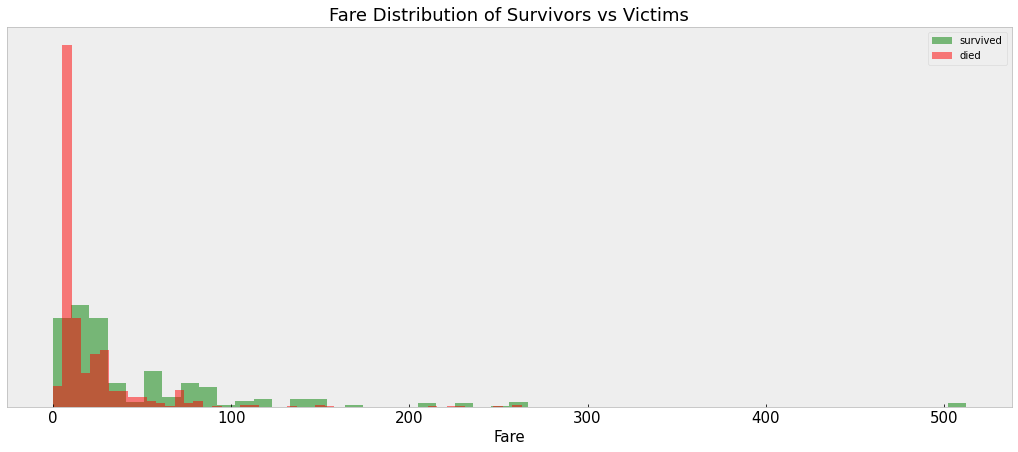

In [73]:
"""Plot histogram of survivor's vs victims fare."""
numHistByCat(df_train.Fare)

In [74]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.Fare)

'Anova Result between Fare & Survived: f=> 63.03076422804448, p=> 6.120189341921873e-15'

In [75]:
"""Let's create a box plot between Age and Survived to have an idea by how much Age is associated with Survived. Also find point biserial correlation between them."""
boxplotAndCorrelation(df_train.Age)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [76]:
numGroupedByCat(df_train.Age)

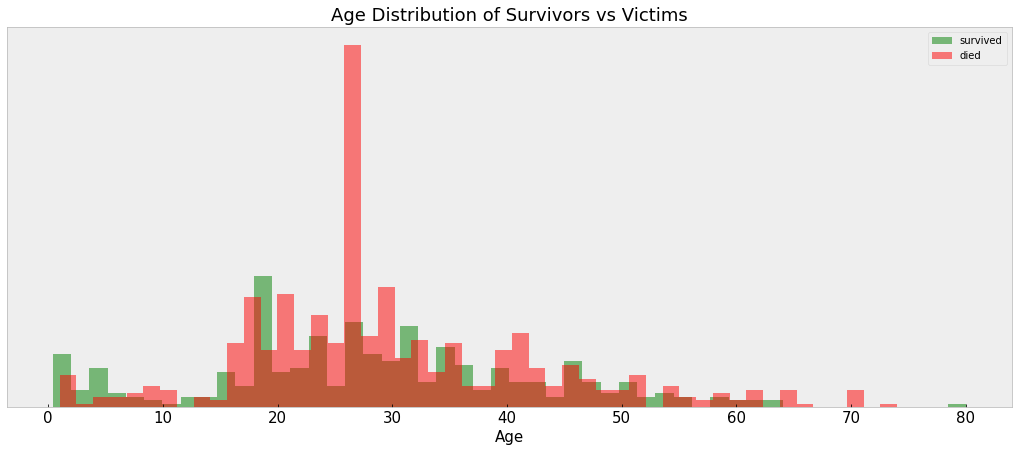

In [77]:
"""Histogram of survivors vs victims age."""
numHistByCat(df_train.Age)

In [78]:
"""Perform ANOVA between all the levels of Survived (i.e., 0 and 1) and Age."""
calculateAnova(df_train.Age)

'Anova Result between Age & Survived: f=> 3.162396652163441, p=> 0.07569419096180038'

In [79]:
"""#1.Create a function that calculates absolute and relative frequency of Survived variable by a categorical variable. And then plots the absolute and relative frequency of Survived by a categorical variable."""
def calculateCrosstabulation(catVariable, targetCatVariable=df_train.Survived):
    """ Plots cross tabulation in absolute and relative scale.
    catVariable = input categorical variable, 
    targetCatVariable = our target categorical variable."""
    
    # Calculate cross tabulation in abs and relative scale
    absCount = pd.crosstab(index = catVariable, columns = targetCatVariable)\
    .rename(columns={0:"Victims",1:"Survivors"})
    relCount = pd.crosstab(index = catVariable, columns = targetCatVariable, normalize="index")\
    .rename(columns={0:"Victims",1:"Survivors"})*100
    relCount = relCount.round(1)
    
    # Create two subplots of bar chart
    fig=make_subplots(
        rows=2, 
        cols=1,
        vertical_spacing=0.3,
        subplot_titles=(f"Absolute Count of Survival and Death by {catVariable.name}", 
                        f"Percentage Count of Survival and Death by {catVariable.name}"),
        print_grid=False) # This suppresses "This is the format of your plot grid:" text from popping out.

    # Add trace for absolute frequency
    for col in absCount.columns:
        fig.add_trace(go.Bar(x=absCount.index,
                             y=absCount[col],
                             text=absCount[col],
                             hoverinfo="x+y",
                             textposition="auto",
                             name=f"{col}",
                             textfont=dict(family="sans serif",size=14),
                             ),
                     row=1,
                     col=1
                     )


    # Add another trace for relative frequency
    for col in relCount.columns:
        fig.add_trace(go.Bar(x=relCount.index,
                             y=relCount[col],
                             text=relCount[col],
                             hoverinfo="x+y",
                             textposition="auto",
                             name=f"{col}",
                             textfont=dict(family="sans serif",size=14),
                            ),
                     row=2,
                     col=1
                     )
        
    # Update the layout. Add title, dimension, and background color
    fig.layout.update(
        height=600, 
        width=1000,
        hovermode="closest",
        barmode = "group",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )

    # Set y-axes titles in bold
    fig.layout.yaxis1.update(title="<b>Abs Frequency</b>")
    fig.layout.yaxis2.update(title="<b>Rel Frequency(%)</b>")
    
    # Set x-axis title in bold
    fig.layout.xaxis2.update(title=f"<b>{catVariable.name}</b>")
    return fig.show()

    
"""#2.Create a function to calculate chi square test between a categorical and target categorical variable."""
def calculateChiSquare(catVariable, targetCatVariable=df_train.Survived):
    """Returns chi square test restult between independent and dependent target variables."""
    
    catGroupedByCatTarget = pd.crosstab(index = catVariable, columns = targetCatVariable)
    testResult = stats.chi2_contingency(catGroupedByCatTarget)
    print(f"Chi Square Test Result between {targetCatVariable.name} & {catVariable.name}:")
    return print(testResult)


"""#3.Finally create another function to calculate Bonferroni-adjusted pvalue for a categorical and target categorical variable."""
def calculateBonferroniAdjusted(catVariable, targetCatVariable=df_train.Survived):
    """Returns bonferroni-adjusted pvalue between independent and dependent target variables."""
    
    # Create one hot encoding for the independent categorical variable
    catEncoded = pd.get_dummies(catVariable)
    for column in catEncoded.columns:
        catGroupedByCatTarget = pd.crosstab(index = catEncoded[column], columns = targetCatVariable)
        testResult = stats.chi2_contingency(catGroupedByCatTarget)
        print(f"Bonferroni-adjusted pvalue between {catVariable.name}({column}) and {targetCatVariable.name}:")
        print(f"{testResult}\n")

In [80]:
"""Plot the no of passergers who survived and died due to their sex in absolute and relative scale."""
calculateCrosstabulation(df_train.Sex)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [81]:
"""Perform chi-square test of independence between Survived and Sex."""
calculateChiSquare(df_train.Sex)

Chi Square Test Result between Survived & Sex:
(260.71702016732104, 1.1973570627755645e-58, 1, array([[193.47474747, 120.52525253],
       [355.52525253, 221.47474747]]))


In [82]:
"""Plot the number of passengers who survived and died due to their pclass in absolute and relative scale."""
calculateCrosstabulation(df_train.Pclass)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [83]:
"""Perform chi-square test of independence between Survived and Pclass."""
calculateChiSquare(df_train.Pclass)

Chi Square Test Result between Survived & Pclass:
(102.88898875696056, 4.549251711298793e-23, 2, array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]]))


In [84]:
"""Calculate Bonferroni-adjusted pvalue for Pclass (1,2,3) and Survived."""
calculateBonferroniAdjusted(df_train.Pclass)

Bonferroni-adjusted pvalue between Pclass(1) and Survived:
(71.46583854616047, 2.821002116713357e-17, 1, array([[415.90909091, 259.09090909],
       [133.09090909,  82.90909091]]))

Bonferroni-adjusted pvalue between Pclass(2) and Survived:
(7.2971925540056475, 0.006906243870048795, 1, array([[435.62626263, 271.37373737],
       [113.37373737,  70.62626263]]))

Bonferroni-adjusted pvalue between Pclass(3) and Survived:
(91.23179223158795, 1.277904920294387e-21, 1, array([[246.46464646, 153.53535354],
       [302.53535354, 188.46464646]]))



In [85]:
"""Count and plot the survivors and victims by place of embarkation in absolute and relative scale."""
calculateCrosstabulation(df_train.Embarked)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [86]:
"""Now perform chi-square test to find the association between Embarked and Survived."""
calculateChiSquare(df_train.Embarked)

Chi Square Test Result between Survived & Embarked:
(25.964452881874784, 2.3008626481449577e-06, 2, array([[103.51515152,  64.48484848],
       [ 47.44444444,  29.55555556],
       [398.04040404, 247.95959596]]))


In [87]:
"""Calculate Bonferroni-adjusted pvalue  between Embarked (C,Q,S one by one) and Survived."""
calculateBonferroniAdjusted(df_train.Embarked)

Bonferroni-adjusted pvalue between Embarked(C) and Survived:
(24.34294028991685, 8.062166851376562e-07, 1, array([[445.48484848, 277.51515152],
       [103.51515152,  64.48484848]]))

Bonferroni-adjusted pvalue between Embarked(Q) and Survived:
(0.00018551307377882246, 0.9891328942213099, 1, array([[501.55555556, 312.44444444],
       [ 47.44444444,  29.55555556]]))

Bonferroni-adjusted pvalue between Embarked(S) and Survived:
(19.279400244953347, 1.1291808110540787e-05, 1, array([[150.95959596,  94.04040404],
       [398.04040404, 247.95959596]]))



In [88]:
"""Count and plot absolute and relative number of survivors and victims due to SibSp."""
calculateCrosstabulation(df_train.SibSp)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [89]:
"""Chi-square test between SibSp and Survived."""
calculateChiSquare(df_train.SibSp)

Chi Square Test Result between Survived & SibSp:
(37.2717929152043, 1.5585810465902147e-06, 6, array([[374.62626263, 233.37373737],
       [128.77777778,  80.22222222],
       [ 17.25252525,  10.74747475],
       [  9.85858586,   6.14141414],
       [ 11.09090909,   6.90909091],
       [  3.08080808,   1.91919192],
       [  4.31313131,   2.68686869]]))


In [90]:
"""Visualize absolute and relative number of survivors and victims by Parch."""
calculateCrosstabulation(df_train.Parch)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [91]:
"""Perform Chi-square test of independence between Parch and Survived."""
calculateChiSquare(df_train.Parch)

Chi Square Test Result between Survived & Parch:
(27.925784060236168, 9.703526421039997e-05, 6, array([[4.17757576e+02, 2.60242424e+02],
       [7.27070707e+01, 4.52929293e+01],
       [4.92929293e+01, 3.07070707e+01],
       [3.08080808e+00, 1.91919192e+00],
       [2.46464646e+00, 1.53535354e+00],
       [3.08080808e+00, 1.91919192e+00],
       [6.16161616e-01, 3.83838384e-01]]))


In [92]:
"""Visualize absolute and relative number of survivors and victims by nameProcessed."""
calculateCrosstabulation(df_train.nameProcessed)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [93]:
"""Perform Chi-square test of independence between nameProcessed and Survived."""
calculateChiSquare(df_train.nameProcessed)

Chi Square Test Result between Survived & nameProcessed:
(289.8360961873925, 1.5325912223703196e-60, 5, array([[  3.08080808,   1.91919192],
       [ 24.64646465,  15.35353535],
       [113.98989899,  71.01010101],
       [318.55555556, 198.44444444],
       [ 77.63636364,  48.36363636],
       [ 11.09090909,   6.90909091]]))


In [94]:
"""Plot the Survived's absolute and percentage count by familySize."""
calculateCrosstabulation(df_train.familySize)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [95]:
"""Perform Chi-square test of independence between familySize and Survived."""
calculateChiSquare(df_train.familySize)

Chi Square Test Result between Survived & familySize:
(66.05581680279249, 2.981870009647575e-14, 3, array([[ 28.95959596,  18.04040404],
       [ 27.11111111,  16.88888889],
       [330.87878788, 206.12121212],
       [162.05050505, 100.94949495]]))


In [96]:
"""Calculate Bonferroni-adjusted pvalue  between familySize and Survived."""
calculateBonferroniAdjusted(df_train.familySize)

Bonferroni-adjusted pvalue between familySize(large) and Survived:
(10.55137053799774, 0.0011610196650239893, 1, array([[520.04040404, 323.95959596],
       [ 28.95959596,  18.04040404]]))

Bonferroni-adjusted pvalue between familySize(medium) and Survived:
(4.418221527178599, 0.03555707818485421, 1, array([[521.88888889, 325.11111111],
       [ 27.11111111,  16.88888889]]))

Bonferroni-adjusted pvalue between familySize(single) and Survived:
(36.00051446773865, 1.9726543846517113e-09, 1, array([[218.12121212, 135.87878788],
       [330.87878788, 206.12121212]]))

Bonferroni-adjusted pvalue between familySize(small) and Survived:
(49.42743388214718, 2.058468013374345e-12, 1, array([[386.94949495, 241.05050505],
       [162.05050505, 100.94949495]]))



In [97]:
"""Count and plot absolute and relative number of survivors and victims due to cabin possession."""
calculateCrosstabulation(df_train.cabinProcessed)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b